# Project Description

# Business Context

In the dynamic and highly competitive airline industry, companies like IndiGo are continuously striving to enhance customer experience and build lasting loyalty. A critical component of this effort is understanding and predicting passenger referrals, which can significantly influence the airline's market position and reputation. The analysis of passenger reviews from 2006 to 2019 offers IndiGo a comprehensive view into the various facets of the travel experience as perceived by their customers. These reviews provide invaluable feedback on service quality, including comfort, service, and overall value, and play a key role in shaping potential customers' perceptions.

By leveraging this extensive dataset, IndiGo aims to develop a predictive model to identify which passengers are most likely to recommend the airline to others. This insight enables IndiGo to:

# 1. Enhance Customer Experience:

By pinpointing the factors that most influence positive referrals, IndiGo can focus on improving these aspects of their service, ensuring that they meet or exceed customer expectations.

# 2. Targeted Improvements:

The ability to predict referrals allows IndiGo to address specific areas needing improvement, whether it be in-flight comfort, customer service, or overall value for money.

# 3. Strategic Marketing:

Understanding referral patterns can help IndiGo tailor their marketing strategies to leverage positive word-of-mouth and foster a strong brand reputation.


# 4. Competitive Edge:

By continuously refining their services based on customer feedback, IndiGo can differentiate itself from competitors and strengthen its position in the market.

# Dataset Description
# Fields and Descriptions

```airline: Name of the airline.```

```overall: Overall points given to the trip between 1 and 10.```

```author: Author of the trip.```

```reviewdate: Date of the customer's review.```

```aircraft: Type of the aircraft.```

```travellertype: Type of traveler (e.g., business, leisure).```

```Flight date: Cabin at the flight date flown.```

```cabin service: Rated between 1-5.```

```foodbev: Rated between 1-5.```

```groundservice: Rated between 1-5.```

```valueformoney: Rated between 1-5.```

```recommended: Binary, target variable.```

In [1]:
# importing liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel(r"data_airline_reviews.xlsx")


In [3]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [5]:
df.shape

(131895, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [8]:
df.duplicated().sum()

70711

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(61184, 17)

In [11]:
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*100

airline             0.001634
overall             2.914161
author              0.001634
review_date         0.001634
customer_review     0.001634
aircraft           69.782950
traveller_type     38.644090
cabin               4.051713
route              38.688219
date_flown         38.817338
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
entertainment      34.247516
ground_service     39.250458
value_for_money     3.035107
recommended         2.325771
dtype: float64

In [13]:
def drop_null(df):
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    
    # Identify columns with more than 25% null values
    columns_to_drop = [col for col in df.columns if null_percentage[col] > 25.00]
    
    # Drop those columns
    df.drop(columns=columns_to_drop, inplace=True)
    
    return df


In [14]:
drop_null(df)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1.0,4.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,no


In [15]:
df.isnull().sum()/df.shape[0]*100

airline             0.001634
overall             2.914161
author              0.001634
review_date         0.001634
customer_review     0.001634
cabin               4.051713
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
value_for_money     3.035107
recommended         2.325771
dtype: float64

In [16]:
df.dropna(axis=1,how="all",inplace=True)


In [17]:
df.dropna(axis=0,how="all",inplace=True)

In [18]:
df.shape

(61183, 11)

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
list(df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'cabin',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'value_for_money',
 'recommended']

In [21]:
df.dtypes

airline             object
overall            float64
author              object
review_date         object
customer_review     object
cabin               object
seat_comfort       float64
cabin_service      float64
food_bev           float64
value_for_money    float64
recommended         object
dtype: object

In [22]:
df.head(1)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes


In [23]:
[dtype.name for dtype in df.dtypes]

['object',
 'float64',
 'object',
 'object',
 'object',
 'object',
 'float64',
 'float64',
 'float64',
 'float64',
 'object']

In [24]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [25]:
df.dtypes

airline                    object
overall                   float64
author                     object
review_date        datetime64[ns]
customer_review            object
cabin                      object
seat_comfort              float64
cabin_service             float64
food_bev                  float64
value_for_money           float64
recommended                object
dtype: object

In [26]:
df["author"].value_counts()

author
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
                   ..
A Robbins           1
P Devans            1
T Dayes             1
M Cohn              1
Kasper Hettinga     1
Name: count, Length: 44069, dtype: int64

In [28]:
! pip install textblob


In [29]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Polarity score between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['sentiment_score'] = df['customer_review'].apply(get_sentiment)

print("Sentiment analysis applied. Sentiment score added to dataset.")


Sentiment analysis applied. Sentiment score added to dataset.


In [30]:
df.head(2)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no,0.116667


In [31]:
# Drop the original 'customer review' column
df.drop(columns=['customer_review'], inplace=True)


In [32]:
# dropping unwanted column

df.drop(columns=['author',"review_date"], inplace=True)

In [33]:
df["airline"].value_counts()

airline
Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: count, Length: 81, dtype: int64

In [34]:
df["cabin"].value_counts()

cabin
Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: count, dtype: int64

In [35]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


In [36]:
df.isnull().sum()

airline                0
overall             1782
cabin               2478
seat_comfort        4972
cabin_service       4943
food_bev           12842
value_for_money     1856
recommended         1422
sentiment_score        0
dtype: int64

In [37]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,56211.0,NaN,NaN,NaN,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,NaN,NaN,NaN,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,NaN,NaN,NaN,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,NaN,NaN,NaN,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0
recommended,59761,2,no,31268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment_score,61183.0,NaN,NaN,NaN,0.113088,0.207429,-1.0,-0.017857,0.104545,0.248202,1.0


In [38]:
df['overall'].fillna(df['overall'].mean(), inplace=True)

df['cabin'].fillna(df['cabin'].mode()[0], inplace=True)

df['seat_comfort'].fillna(df['seat_comfort'].mean(), inplace=True)

df['cabin_service'].fillna(df['cabin_service'].mean(), inplace=True)

df['food_bev'].fillna(df['food_bev'].mean(), inplace=True)

df['value_for_money'].fillna(df['value_for_money'].mean(), inplace=True)

df['recommended'].fillna(df['recommended'].mode()[0], inplace=True)


In [39]:
#from sklearn.impute import SimpleImputer
# For numeric columns, we typically use 'mean' or 'median'.
#imputer_numerical = SimpleImputer(strategy='median')  # Use median for numerical columns
#imputer_categorical = SimpleImputer(strategy='most_frequent')  # Use most frequent value for categorical columns

In [40]:
df.isnull().sum()

airline            0
overall            0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
value_for_money    0
recommended        0
sentiment_score    0
dtype: int64

In [41]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


# 3. EXPLORING DATA

In [42]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money', 'sentiment_score']

We have 3 categorical features : ['airline', 'cabin', 'recommended']


In [43]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

airline
Spirit Airlines       4.692480
American Airlines     4.651619
United Airlines       4.533939
British Airways       4.463658
Emirates              2.881519
                        ...   
QantasLink            0.169982
Adria Airways         0.138927
Air Arabia            0.130755
Tunisair              0.116045
Thai Smile Airways    0.078453
Name: proportion, Length: 81, dtype: float64
---------------------------
cabin
Economy Class      77.879476
Business Class     15.674289
Premium Economy     3.942272
First Class         2.503964
Name: proportion, dtype: float64
---------------------------
recommended
no     53.429874
yes    46.570126
Name: proportion, dtype: float64
---------------------------


# Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

# Bivariate Analysis: The analysis of two variables.
# Multivariate Analysis: The analysis of two or more variables.

# Numerical Features

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

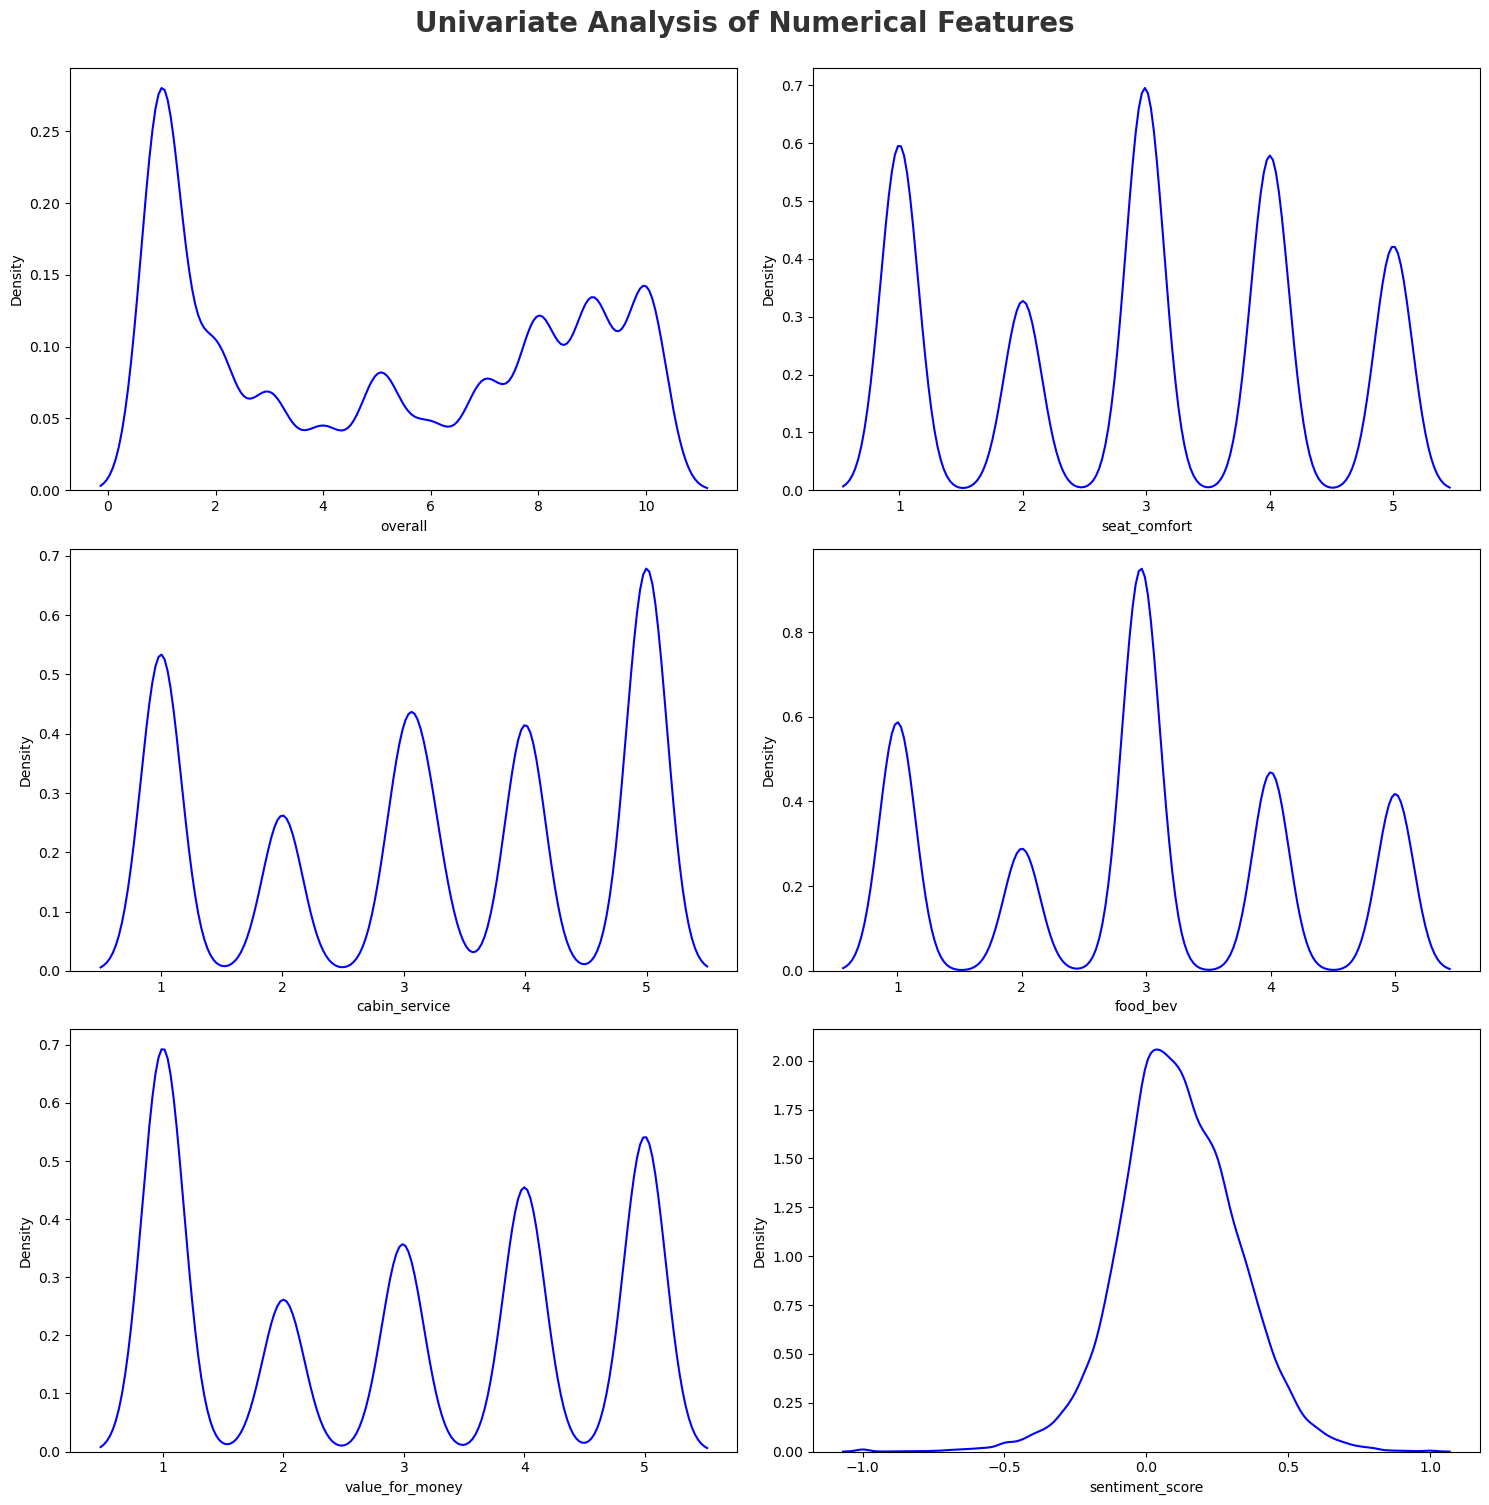

In [125]:
# Calculate the number of rows and columns based on the number of features
n_features = len(numeric_features)
n_cols = 2  # You can adjust this as needed (e.g., 2 columns for 6 features)
n_rows = int(np.ceil(n_features / n_cols))  # Calculate rows to fit all features

# Create the plot
plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop to create subplots for each numerical feature
for i in range(n_features):
    plt.subplot(n_rows, n_cols, i+1)  # Dynamically set subplot grid
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()

# Categorical Features

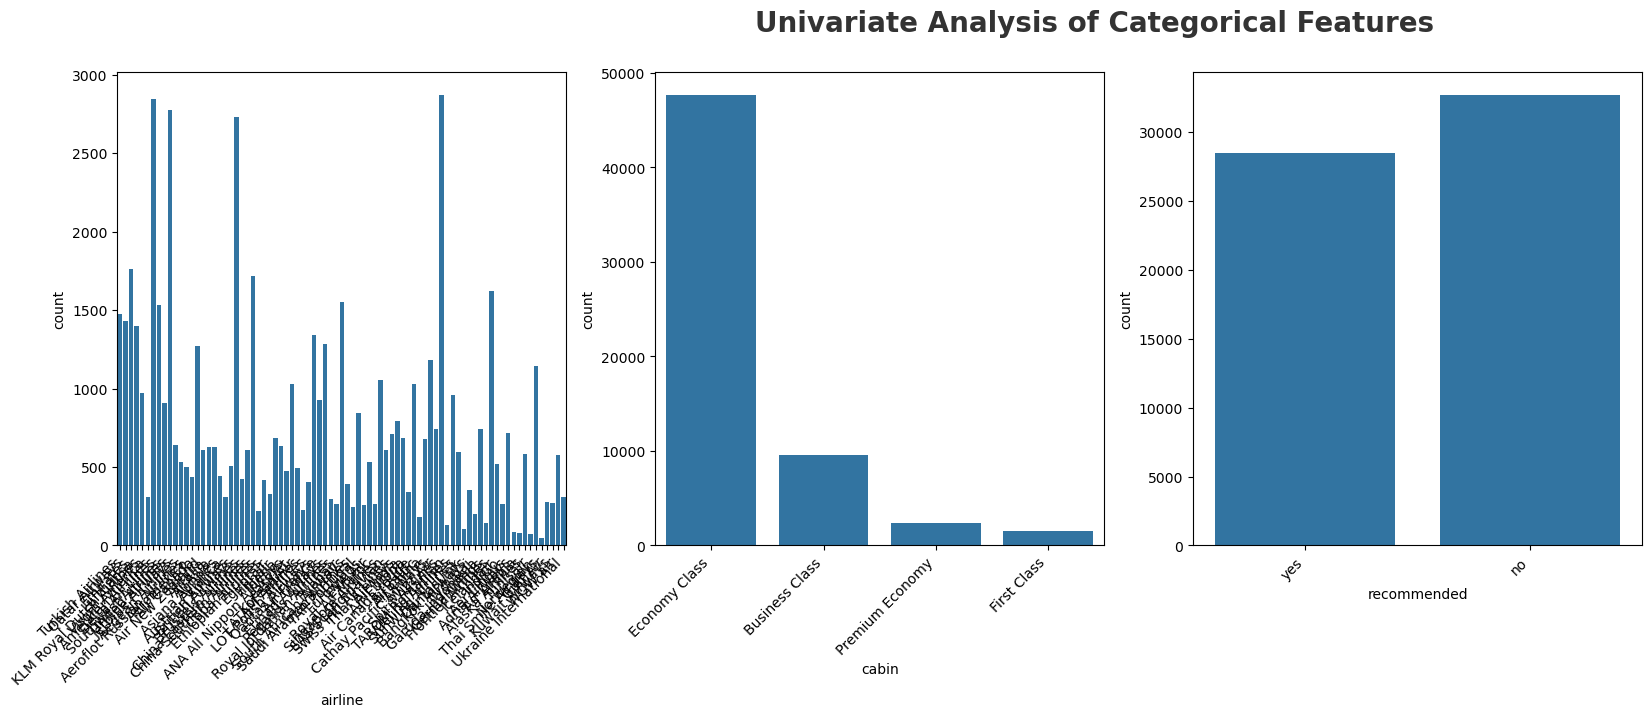

In [126]:
# categorical columns

plt.figure(figsize=(22, 25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()

In [127]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 5 discrete features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money']

We have 1 continuous_features : ['sentiment_score']


# Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

# Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

# Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [128]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['recommended'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,airline,Reject Null Hypothesis
1,cabin,Reject Null Hypothesis
2,recommended,Reject Null Hypothesis


# Report

Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

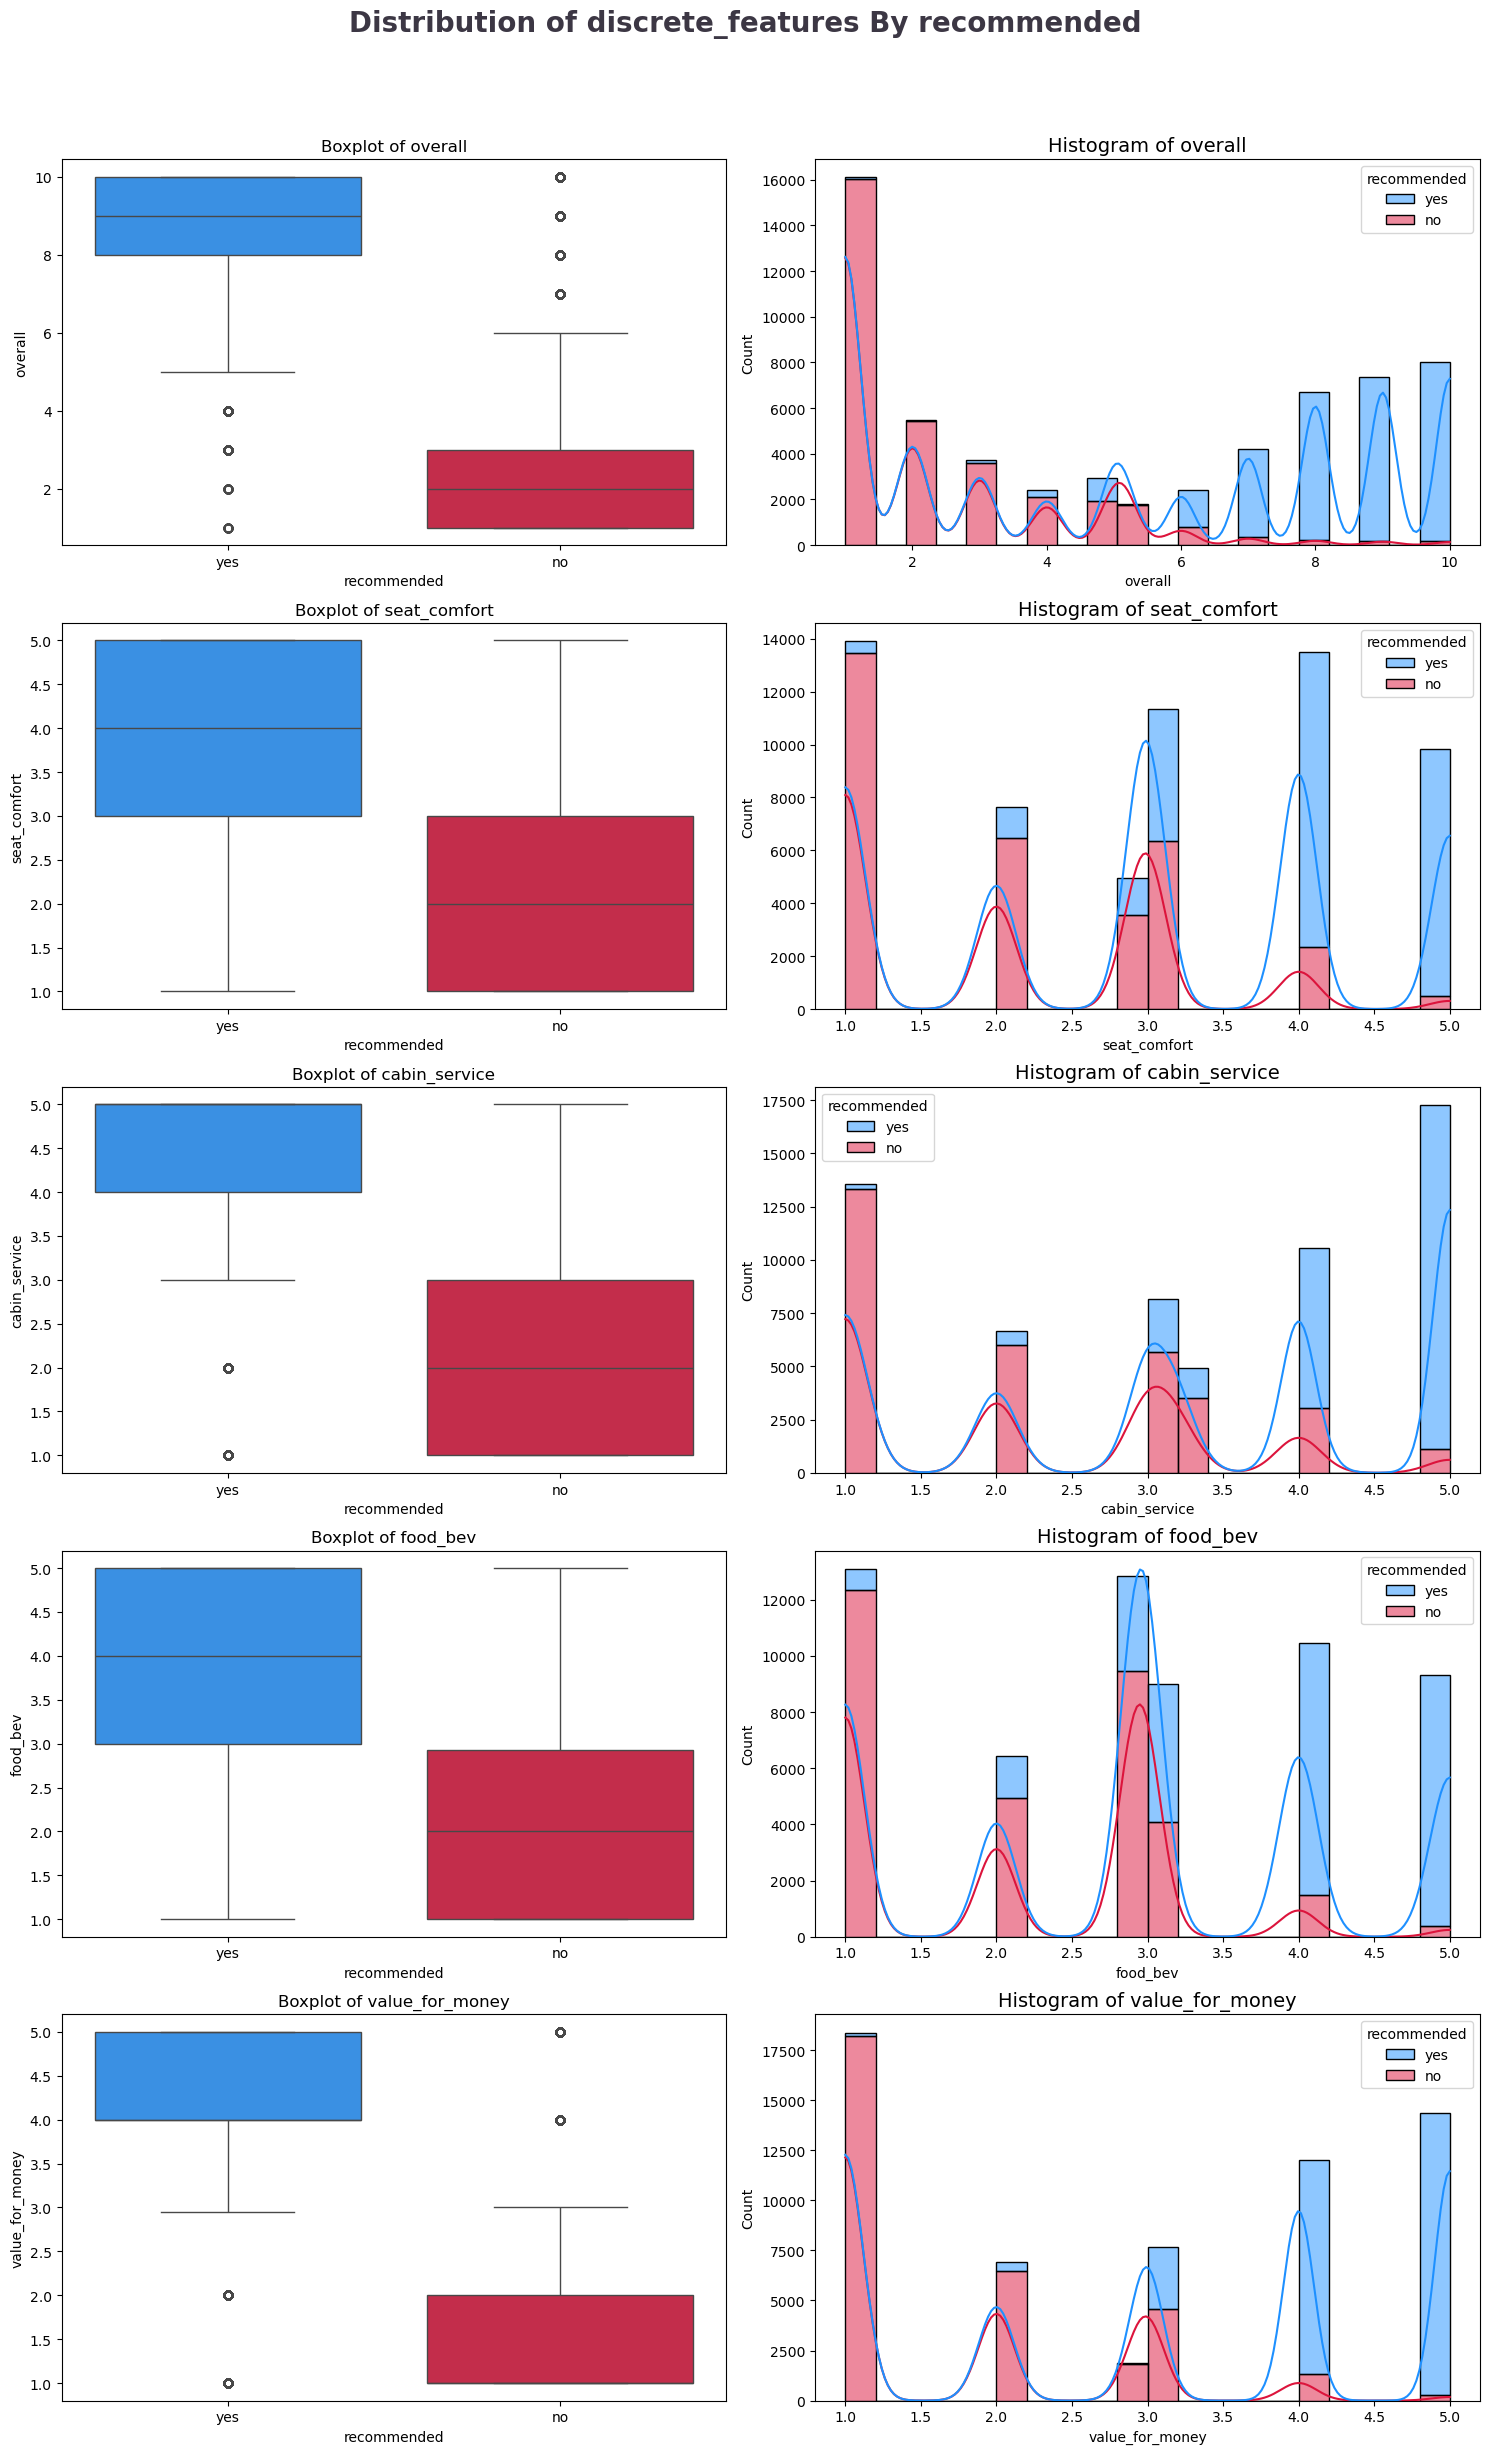

In [129]:

clr1 = ['#1E90FF', '#DC143C']
num_rows = 5 # Define the number of rows in the subplot grid

# Calculate the number of columns based on the number of features
num_cols = math.ceil(len(discrete_features) / num_rows)

# Adjust the figure size to accommodate all the subplots
fig_width = 15
fig_height = 5 * num_rows  # Adjust height to fit all rows nicely

fig, ax = plt.subplots(num_rows, 2, figsize=(fig_width, fig_height))
fig.suptitle('Distribution of discrete_features By recommended', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(discrete_features):   
    if i < num_rows * 2:  # Create subplots only if within the range of available space
        row_index = i % num_rows
        col_index = i // num_rows
        
        sns.boxplot(data=df, x='recommended', y=col,  palette=clr1, ax=ax[row_index, 0])
        ax[row_index, 0].set_title(f'Boxplot of {col}', fontsize=12)

        sns.histplot(data=df, x=col, hue='recommended', bins=20, kde=True, 
                     multiple='stack', palette=clr1, ax=ax[row_index, 1])
        ax[row_index, 1].set_title(f'Histogram of {col}', fontsize=14)
    else:
        break  # Stop creating subplots if we run out of features

# Hide unused subplots
for i in range(len(discrete_features), num_rows * 2):
    ax[i // 2, i % 2].axis('on')

fig.tight_layout()
fig.subplots_adjust(top=0.92)
# plt.savefig('images/multivariate_num.png')


In [130]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['overall', 'sentiment_score']


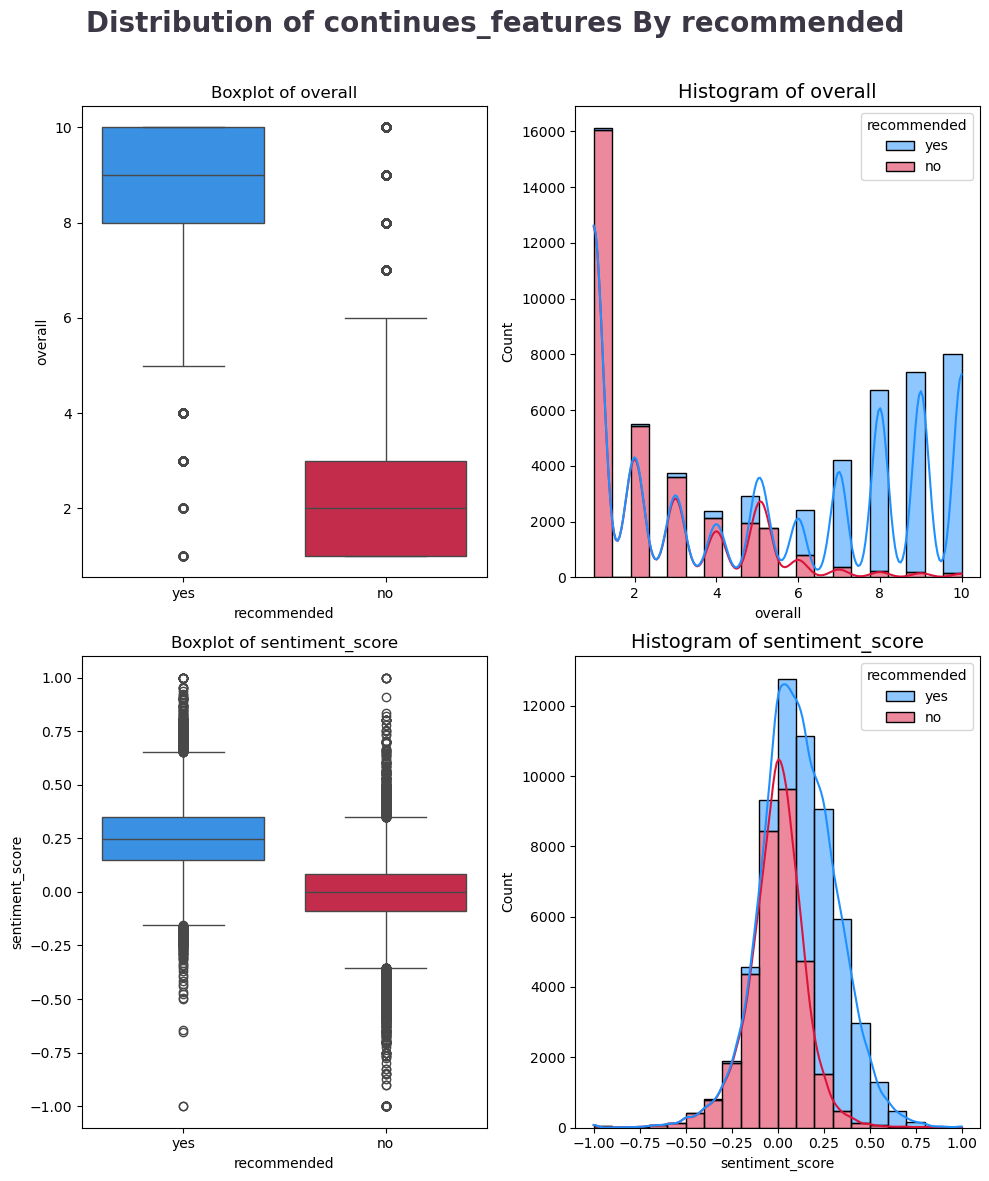

In [131]:
clr1 = ['#1E90FF', '#DC143C']
num_rows=2
fig, ax = plt.subplots(num_rows, 2, figsize=(10,12))
fig.suptitle('Distribution of continues_features By recommended', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='recommended', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='recommended', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

# 4. Visualization
# 4.1 Visualize the Target Feature

In [132]:
df.recommended.value_counts()

recommended
no     32690
yes    28493
Name: count, dtype: int64

In [133]:
df.recommended.value_counts(normalize=True)*100

recommended
no     53.429874
yes    46.570126
Name: proportion, dtype: float64

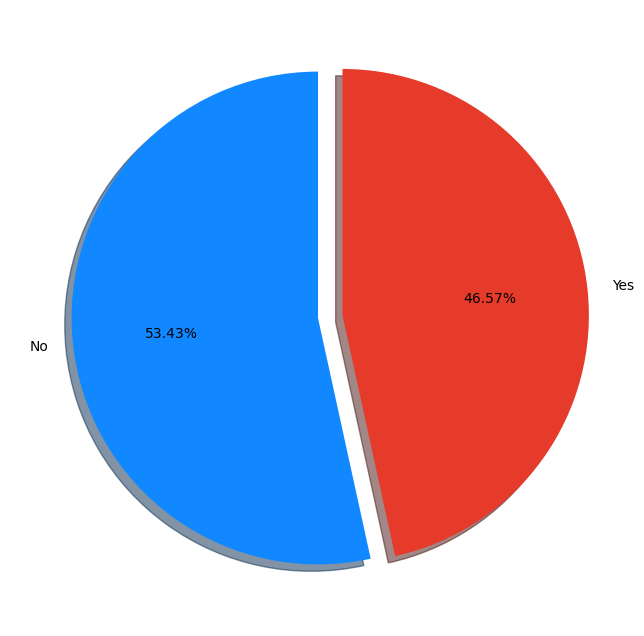

In [134]:
percentage = df.recommended.value_counts(normalize=True)*100
labels = ["No","Yes"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

# From the chart it is seen that the Target Variable is Imbalanced What is imbalanced data?
Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.
# General Rule of Thumb:
Difference ≤ 20%: Balanced or slight imbalance.

Difference between 20% and 40%: Moderate imbalance.

Difference ≥ 40%: Severe imbalance.

Example from Your Data:

Class "No" = 53.43% and Class "Yes" = 46.57%.

The difference between the classes is 53.43% - 46.57% = 6.86%.

This 6.86% difference means your dataset is very well balanced, and we don’t need to worry about imbalance.


In [135]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


# 4.2 Does airline	 has any impact on recommended	 ?

In [136]:
#group data by airline and their count of recommendation
df.groupby('airline')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
airline                recommended            
ANA All Nippon Airways yes           81.395349
                       no            18.604651
Adria Airways          no            50.588235
                       yes           49.411765
Aegean Airlines        yes           78.679245
...                                        ...
airBaltic              yes           43.646409
easyJet                yes           53.883495
                       no            46.116505
flydubai               no            69.651741
                       yes           30.348259

[162 rows x 1 columns]

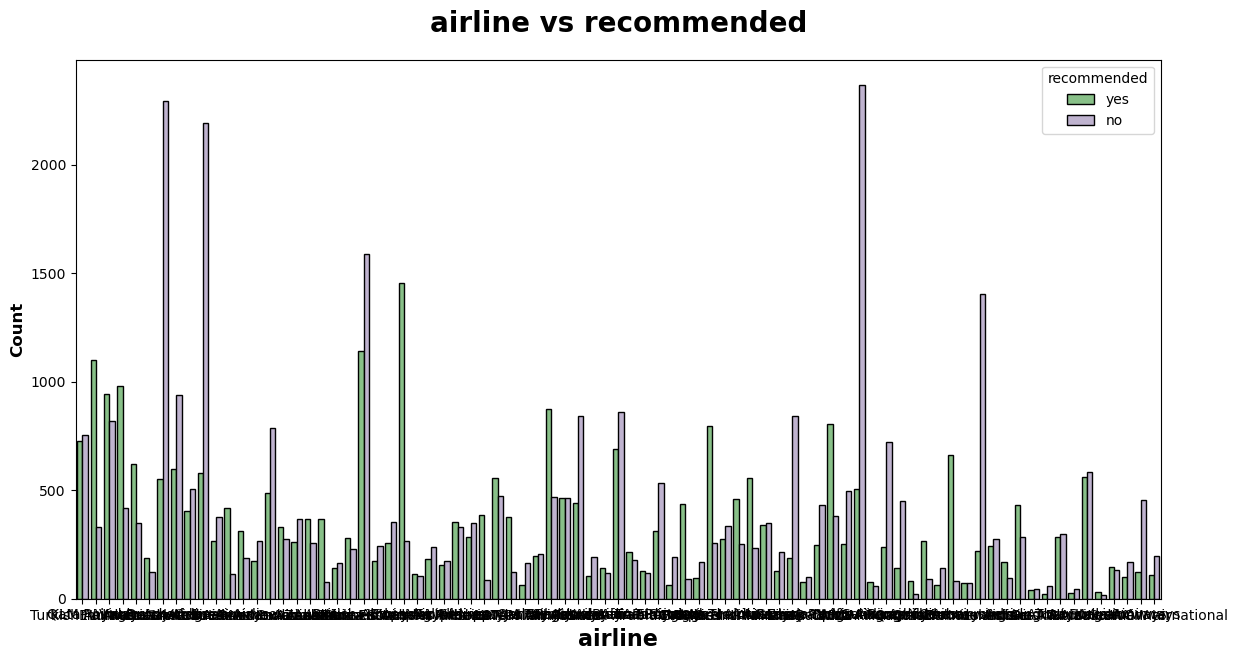

In [137]:
plt.subplots(figsize=(14,7))
sns.countplot(x="airline",hue="recommended", data=df, ec = "black",palette="Accent")
plt.title("airline vs recommended", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("airline", weight="bold", fontsize=16)
plt.legend(title="recommended", fancybox=True)
plt.show()

In [138]:
df2 = df.copy()

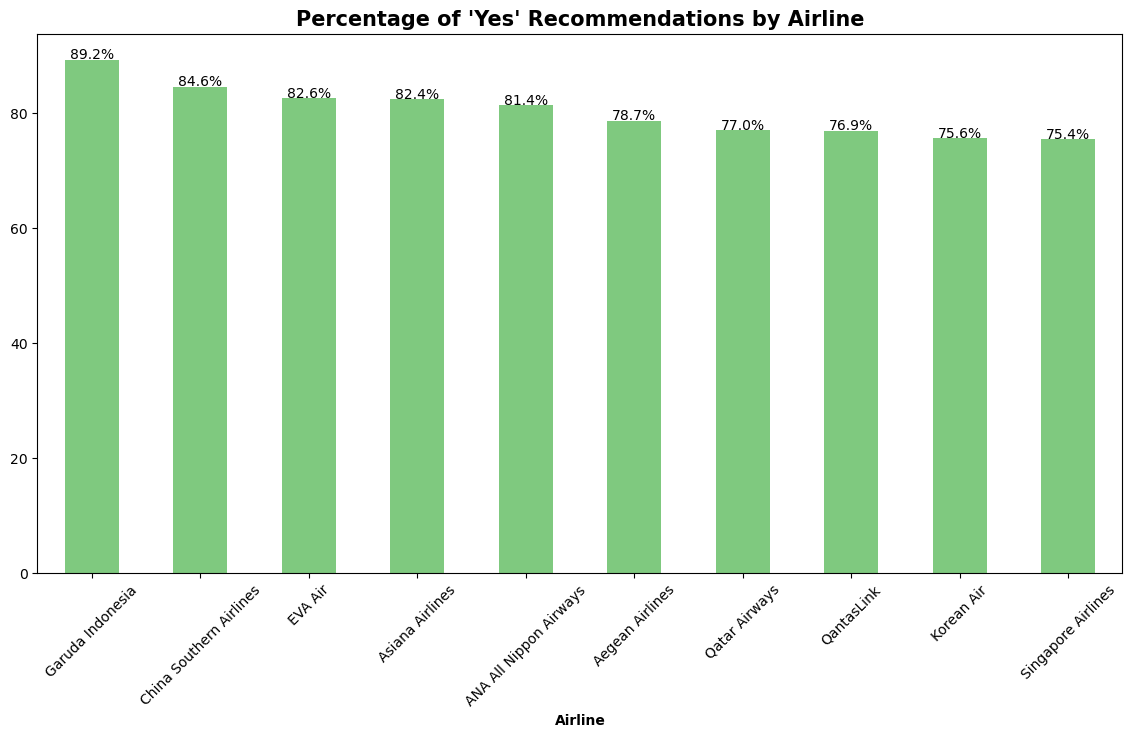

In [139]:
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'yes' for each airline
order1 = 100 * df2[df2["recommended"] == 'yes']['airline'].value_counts() / df2['airline'].value_counts()

# Sort the values in descending order
order1_sorted = order1.sort_values(ascending=False).head(10)

# Plot the bar chart
order1_sorted.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of 'Yes' Recommendations by Airline", fontsize=15, fontweight='bold')

# Add percentage labels on top of bars
for n in range(order1_sorted.shape[0]):
    count = order1_sorted.iloc[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.1, strt, ha='center')

plt.xlabel("Airline", fontweight='bold')
plt.xticks(rotation=45)
plt.show()


# 4.3 Does overall  has any impact on recommended?

In [140]:
#group data by overall	 and their count of recommendation
df.groupby('overall')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
overall   recommended            
1.000000  no            99.670869
          yes            0.329131
2.000000  no            98.706975
          yes            1.293025
3.000000  no            96.658647
          yes            3.341353
4.000000  no            88.156797
          yes           11.843203
5.000000  no            66.381669
          yes           33.618331
5.164863  no            99.719416
          yes            0.280584
6.000000  yes           67.159278
          no            32.840722
7.000000  yes           91.411625
          no             8.588375
8.000000  yes           96.375839
          no             3.624161
9.000000  yes           97.365204
          no             2.634796
10.000000 yes           97.844237
          no             2.155763

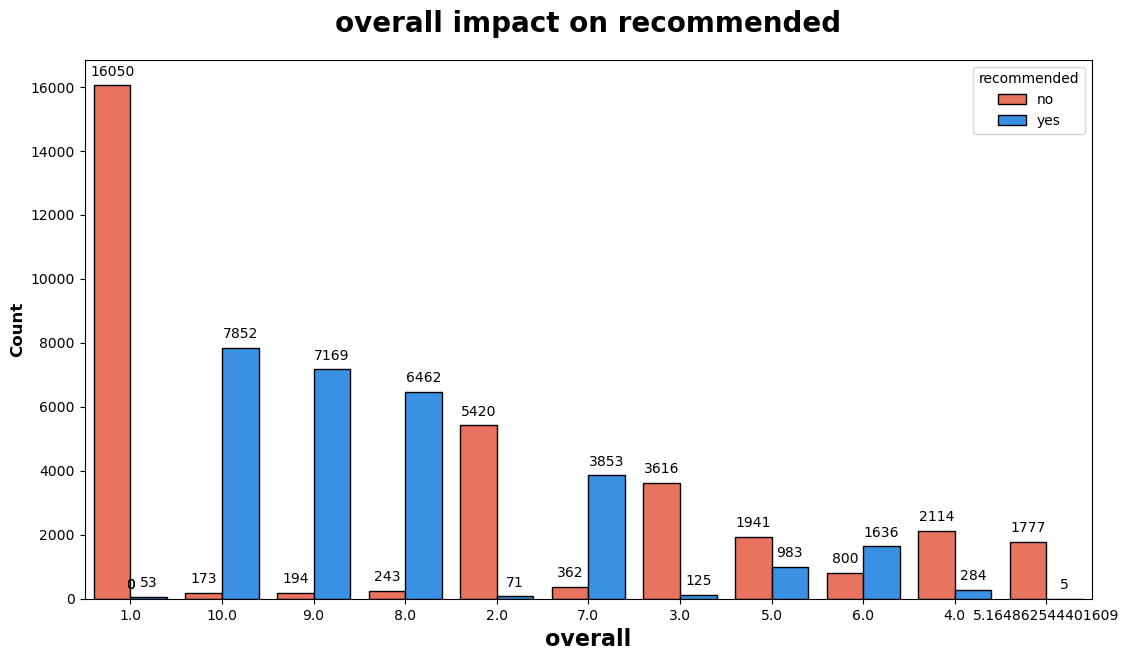

In [141]:
# Define a custom color palette
custom_palette = ['#FF6347', '#1E90FF']  # Example colors for 'yes' and 'no'

overall_order = df['overall'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="overall", hue="recommended", data=df, ec="black", palette=custom_palette,order=overall_order)
plt.title("overall impact on recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("overall", weight="bold", fontsize=16)
plt.legend(title="recommended", fancybox=True)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [142]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


# 4.4 Does cabin has impact on recommended ?

In [143]:
#group data by overall	 and their count of recommendation
df.groupby('cabin')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin           recommended            
Business Class  yes           66.590198
                no            33.409802
Economy Class   no            58.154421
                yes           41.845579
First Class     yes           62.728460
                no            37.271540
Premium Economy yes           50.041459
                no            49.958541

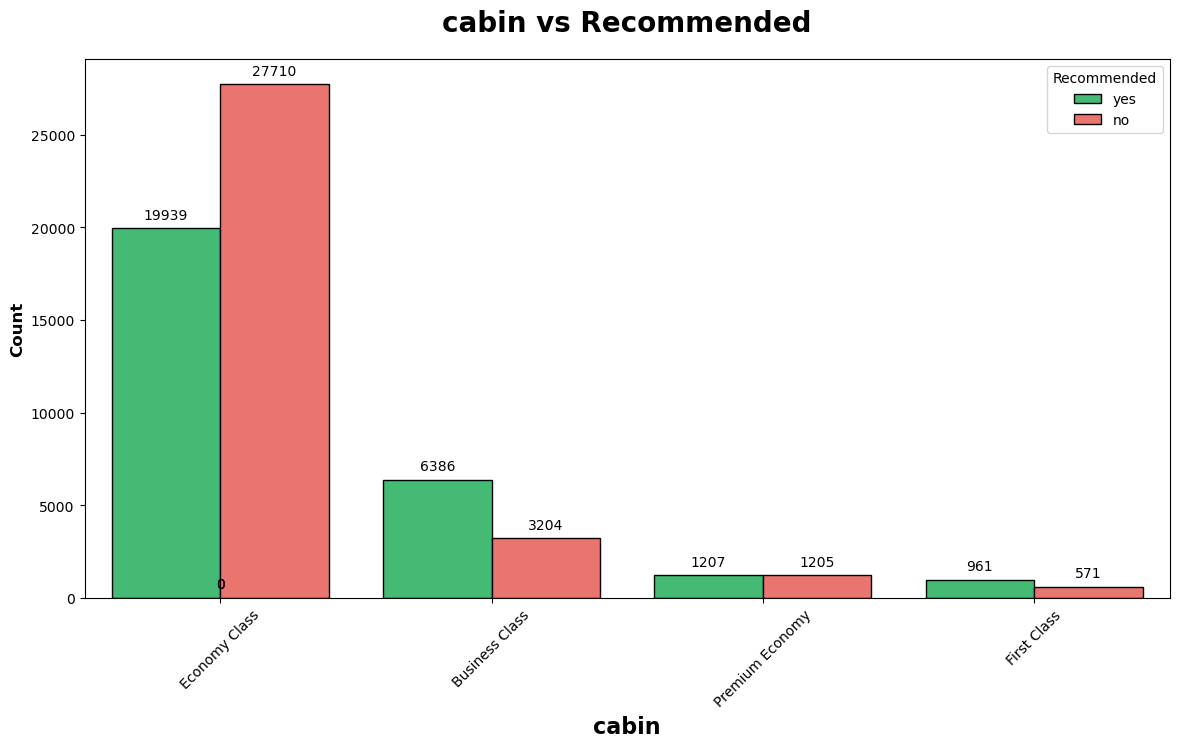

In [144]:
# Sort the airlines by the count of reviews in descending order
airline_order = df['cabin'].value_counts().index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#32CD72', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

# Title and labels
plt.title("cabin vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


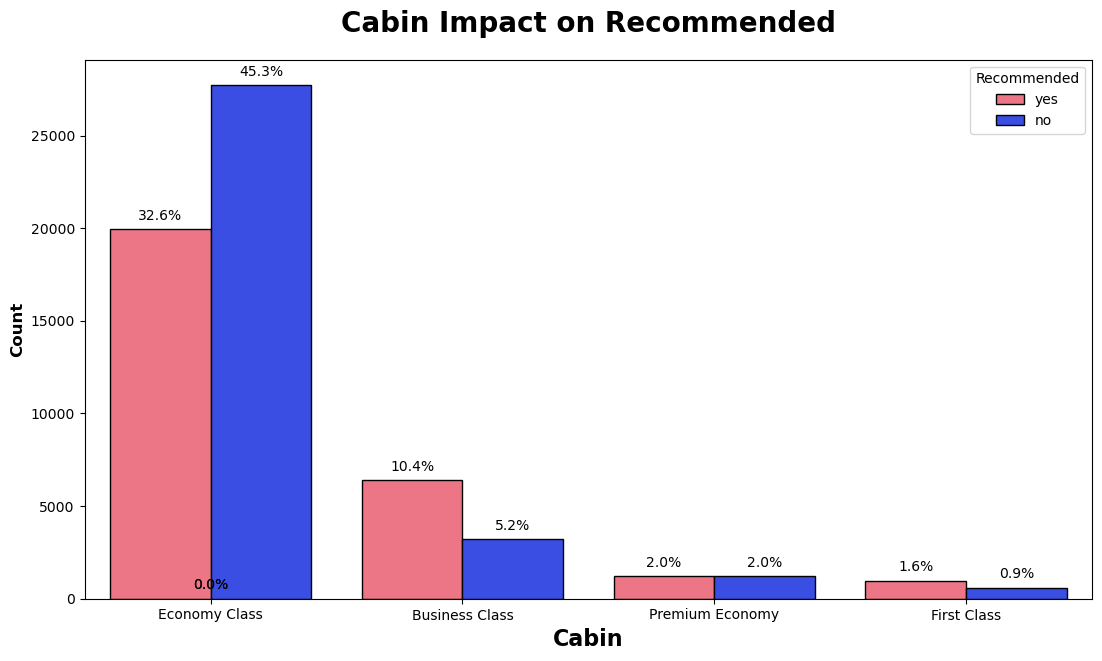

In [145]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6377', 'no': '#1E38FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df['cabin'].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="cabin", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("Cabin Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cabin", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


# 4.5 Does seat_comfort has impact on recommended ?

In [146]:
#group data by overall	 and their count of recommendation
df.groupby('seat_comfort')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
seat_comfort recommended            
1.000000     no            96.879494
             yes            3.120506
2.000000     no            84.592185
             yes           15.407815
2.959278     no            71.279163
             yes           28.720837
3.000000     no            56.048600
             yes           43.951400
4.000000     yes           82.602892
             no            17.397108
5.000000     yes           94.824080
             no             5.175920

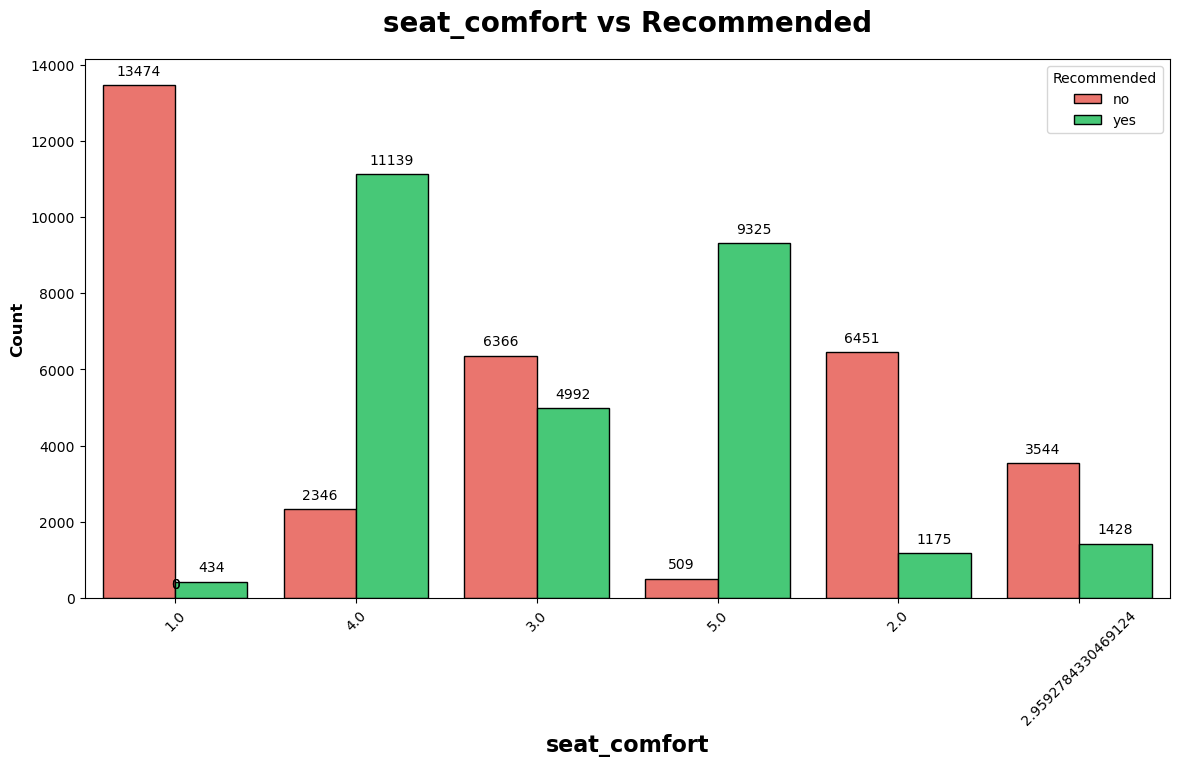

In [147]:
# Sort the airlines by the count of reviews in descending order
airline_order = df['seat_comfort'].value_counts().index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#32DD72', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="seat_comfort", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

# Title and labels
plt.title("seat_comfort vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("seat_comfort", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


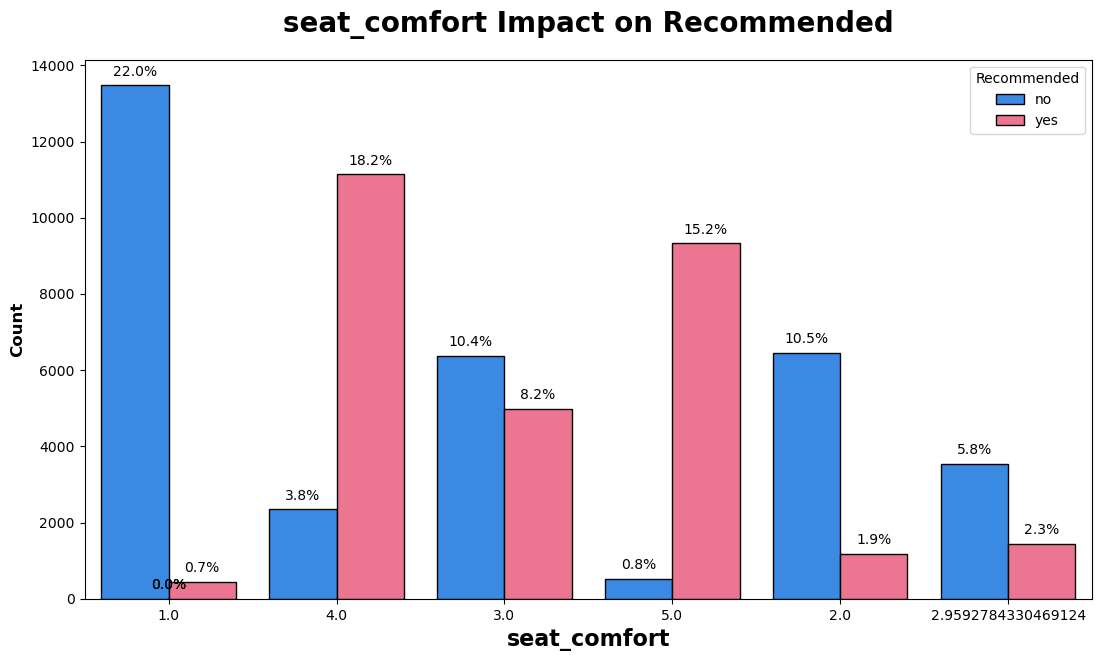

In [148]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6387', 'no': '#1E88FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df['seat_comfort'].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="seat_comfort", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("seat_comfort Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("seat_comfort", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


# 4.6 Does cabin_service has impact on recommended ?

In [149]:
#group data by cabin_service and their count of recommendation
df.groupby('cabin_service')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
cabin_service recommended            
1.000000      no            98.048170
              yes            1.951830
2.000000      no            90.092926
              yes            9.907074
3.000000      no            69.563089
              yes           30.436911
3.200231      no            71.171353
              yes           28.828647
4.000000      yes           71.240406
              no            28.759594
5.000000      yes           93.455725
              no             6.544275

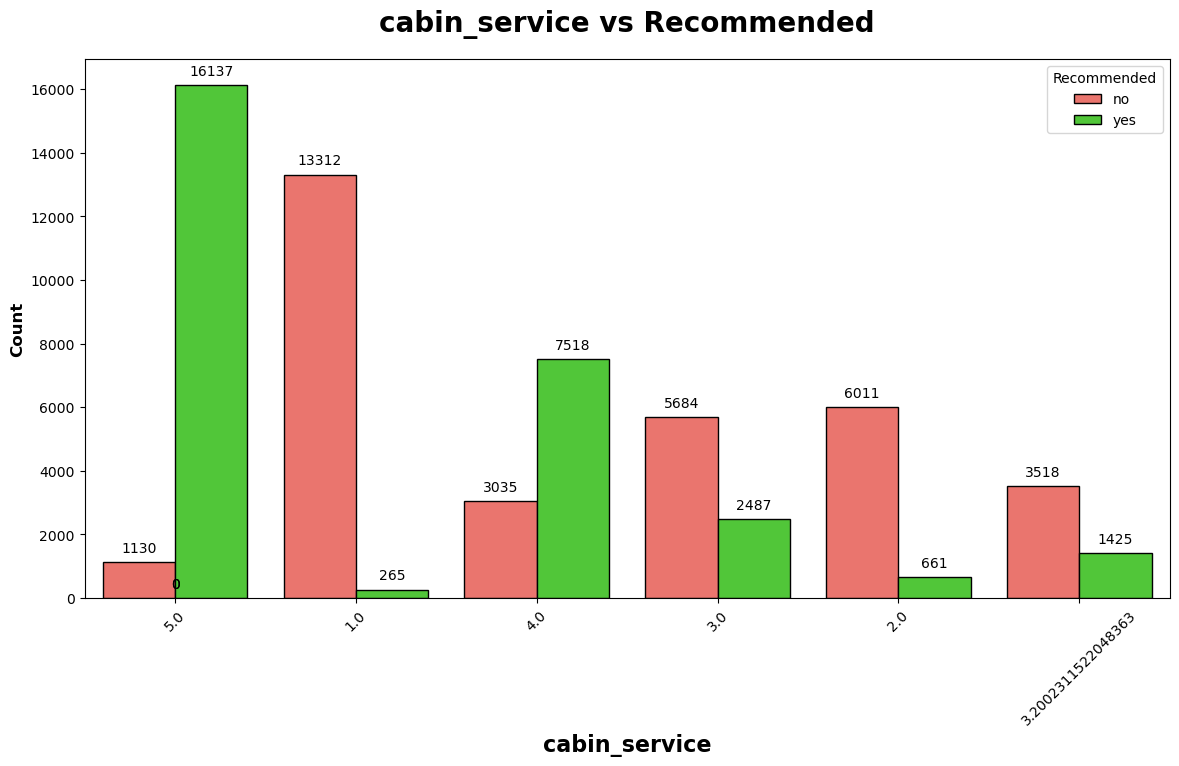

In [150]:
# Sort the airlines by the count of reviews in descending order
airline_order = df['cabin_service'].value_counts().index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#42DD22', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="cabin_service", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

# Title and labels
plt.title("cabin_service vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin_service", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


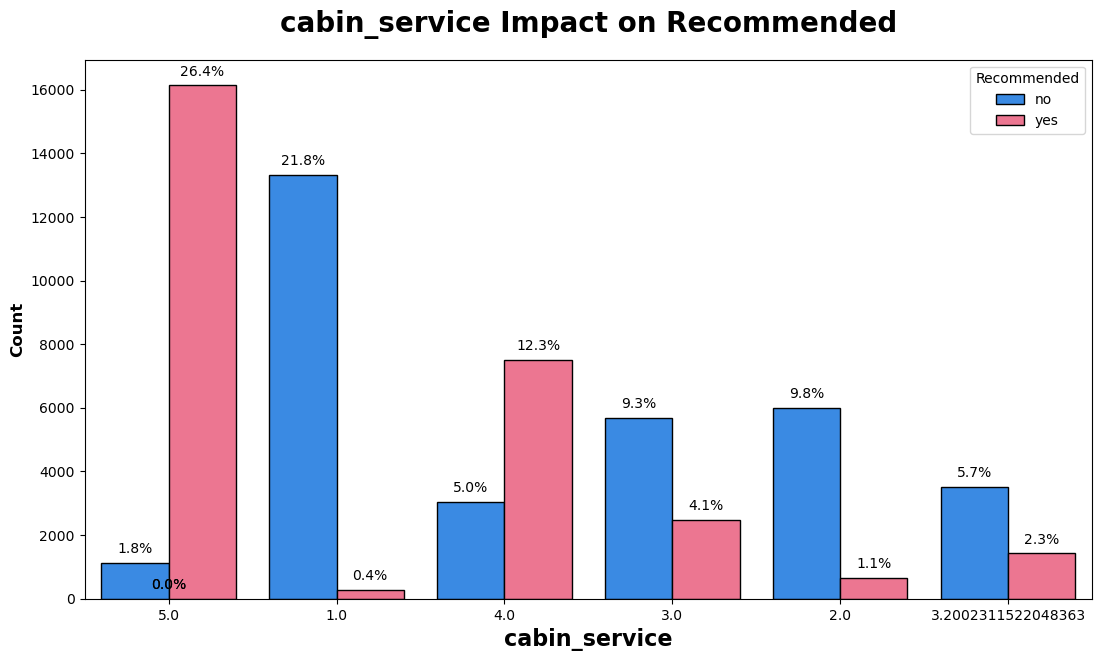

In [151]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6387', 'no': '#1E88FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df["cabin_service"].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="cabin_service", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("cabin_service Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cabin_service", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


# 4.7 Does food_bev has impact on recommended ?

In [152]:
#group data by cabin_service and their count of recommendation
df.groupby('food_bev')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
food_bev recommended            
1.000000 no            94.206107
         yes            5.793893
2.000000 no            76.688927
         yes           23.311073
2.926956 no            73.602243
         yes           26.397757
3.000000 yes           54.542429
         no            45.457571
4.000000 yes           85.878081
         no            14.121919
5.000000 yes           95.890999
         no             4.109001

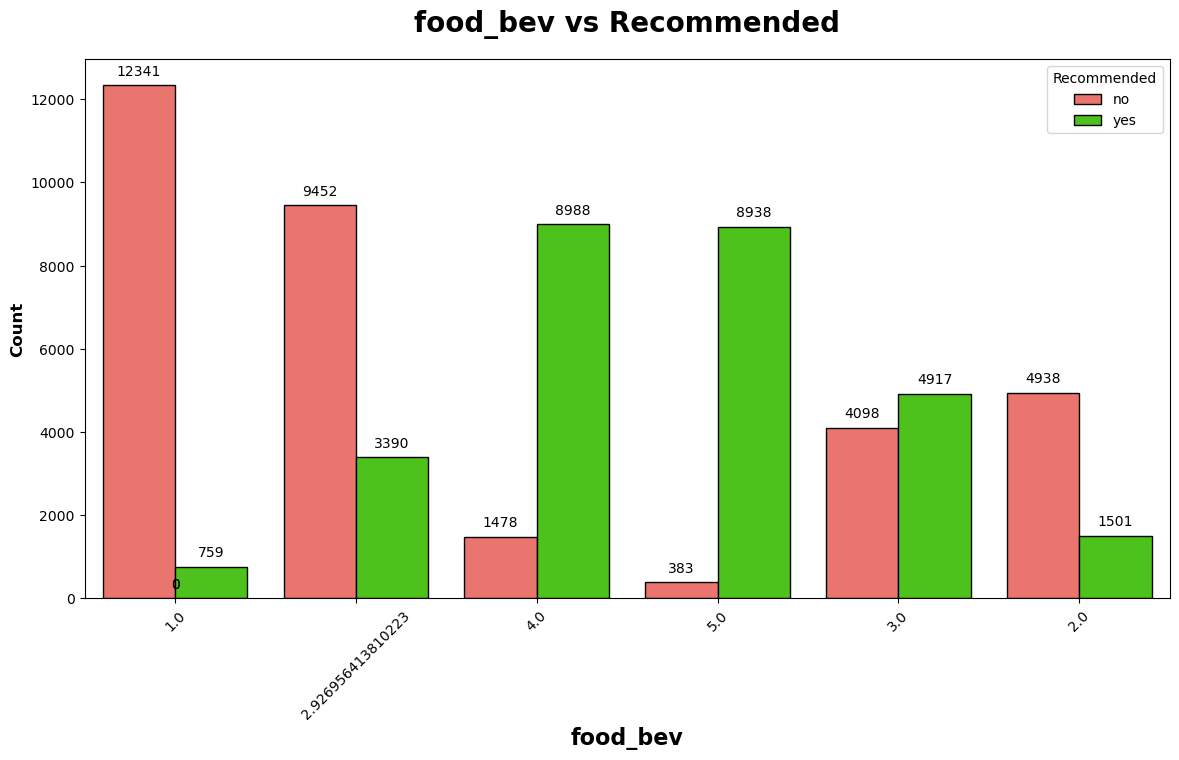

In [153]:
# Sort the airlines by the count of reviews in descending order
airline_order = df['food_bev'].value_counts().index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="food_bev", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

# Title and labels
plt.title("food_bev vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("food_bev", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


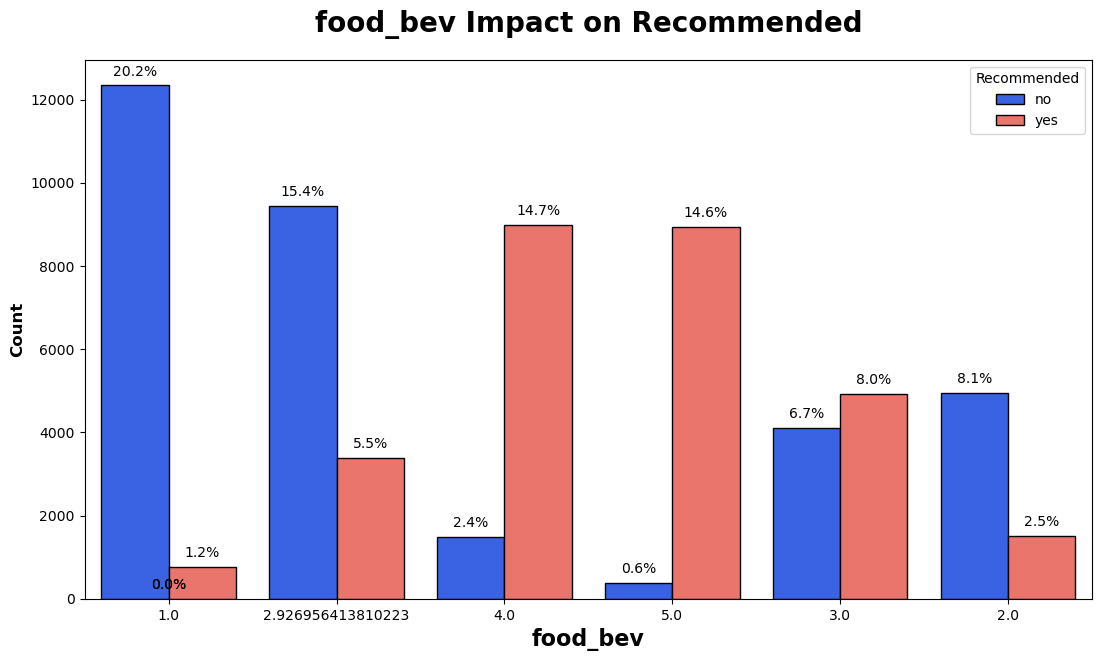

In [154]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df["food_bev"].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="food_bev", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("food_bev Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("food_bev", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


# 4.7 Does value_for_money has impact on recommended ?

In [155]:
#group data by cabin_service and their count of recommendation
df.groupby('value_for_money')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
value_for_money recommended            
1.000000        no            99.090810
                yes            0.909190
2.000000        no            93.871947
                yes            6.128053
2.950849        no            98.329741
                yes            1.670259
3.000000        no            59.979088
                yes           40.020912
4.000000        yes           89.085472
                no            10.914528
5.000000        yes           98.146341
                no             1.853659

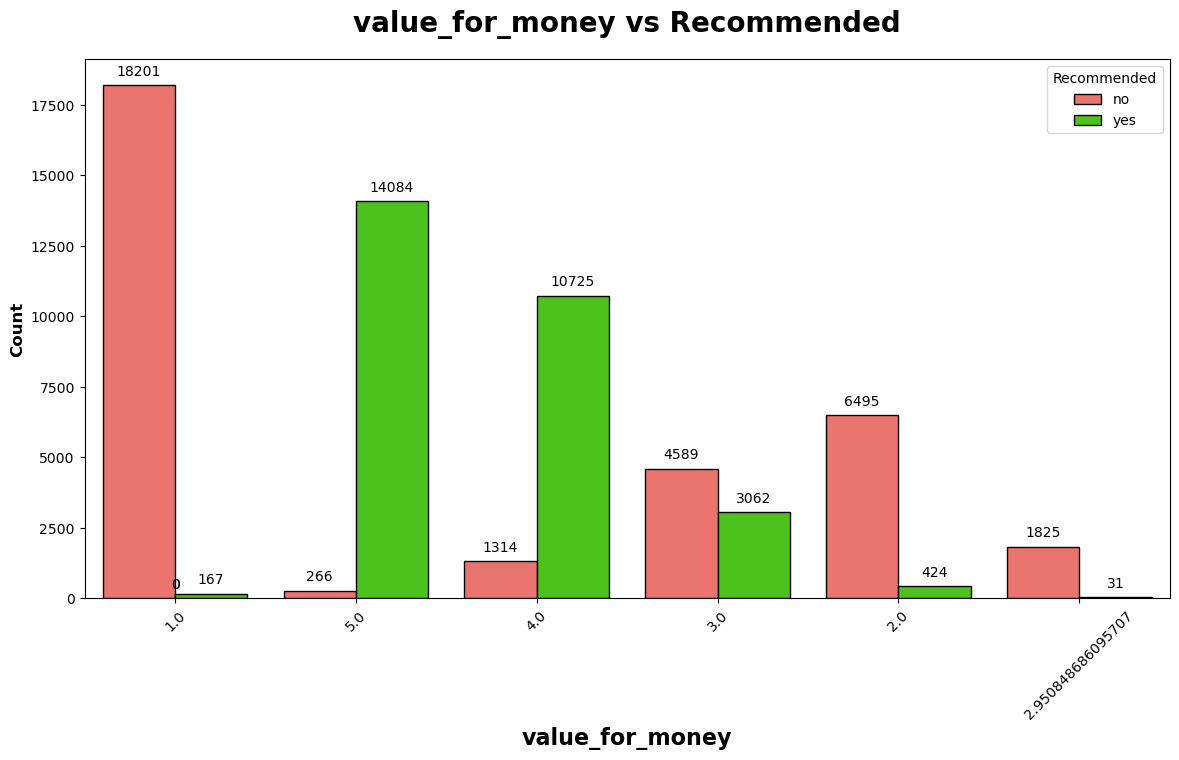

In [156]:
# Sort the airlines by the count of reviews in descending order
airline_order = df['value_for_money'].value_counts().index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="value_for_money", hue="recommended", data=df, ec="black", palette=custom_palette, order=airline_order)

# Title and labels
plt.title("value_for_money vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("value_for_money", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


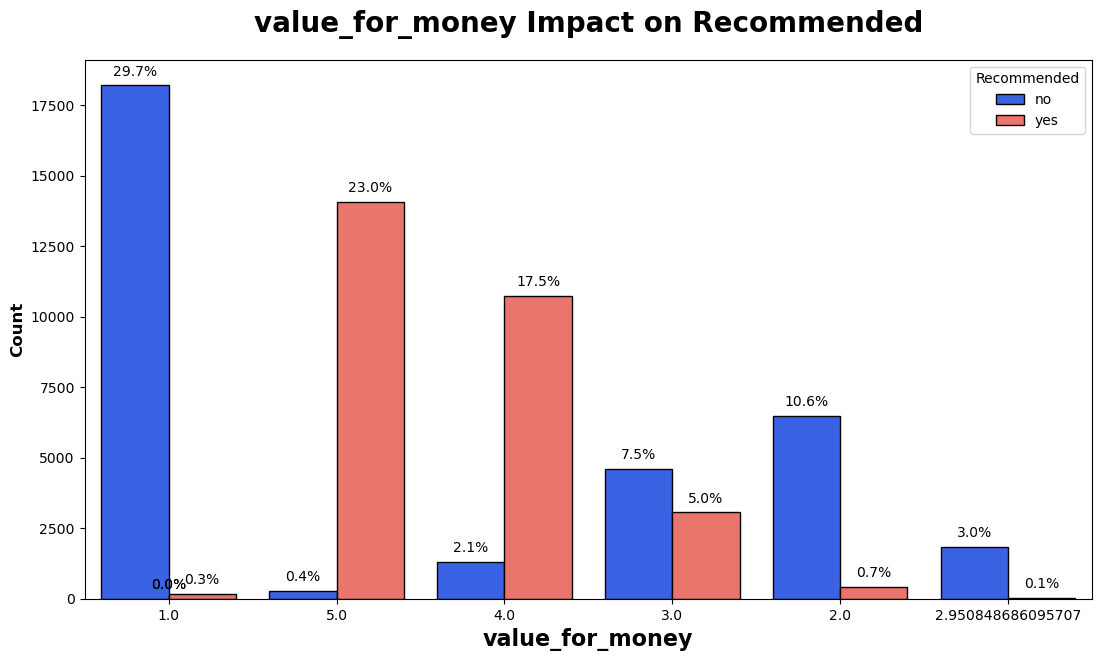

In [157]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df["value_for_money"].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="value_for_money", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("value_for_money Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("value_for_money", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


In [158]:
#group data by overall	 and their count of recommendation
df.groupby('sentiment_score')['recommended'].value_counts(normalize=True).to_frame()*100

proportion
sentiment_score recommended            
-1.000000       no            94.736842
                yes            5.263158
-0.900000       no           100.000000
                no           100.000000
-0.875000       no           100.000000
...                                 ...
 0.950000       yes          100.000000
 0.953333       yes          100.000000
 0.958333       yes          100.000000
 1.000000       yes           68.750000
                no            31.250000

[44870 rows x 1 columns]

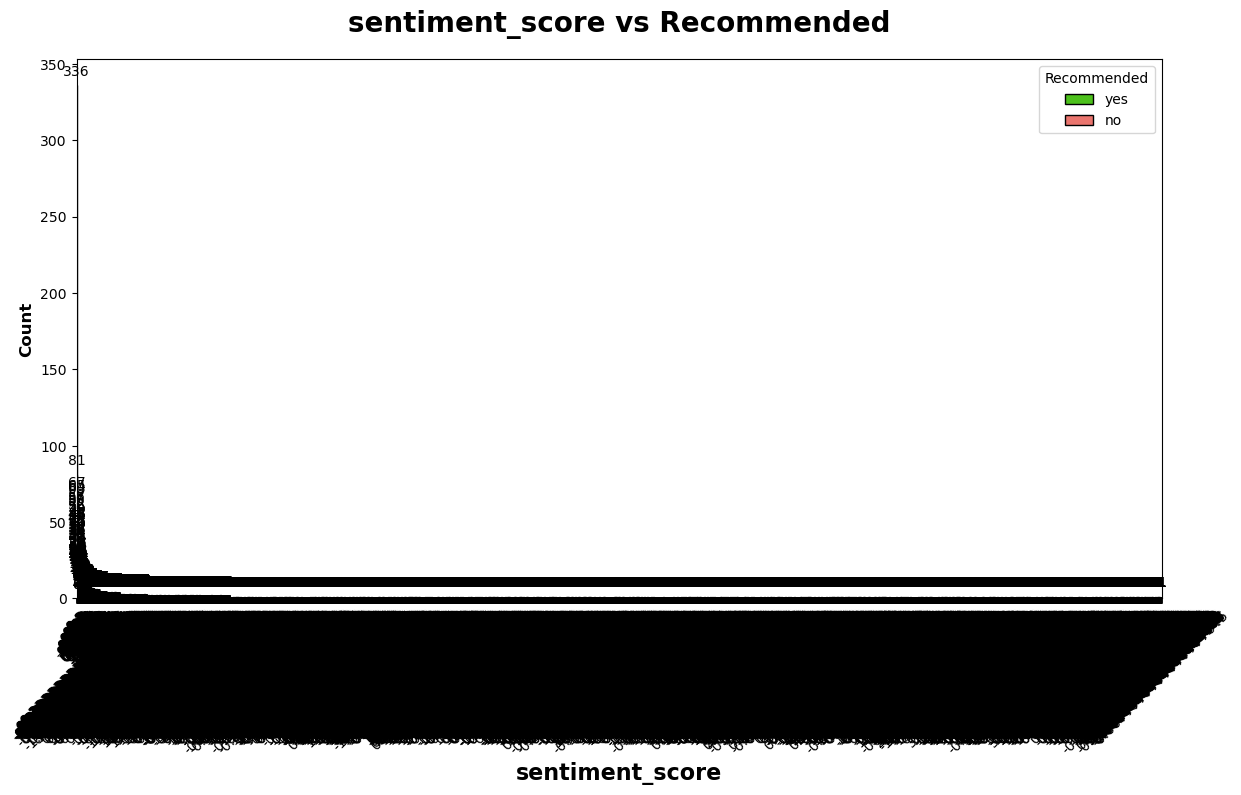

In [161]:
# Sort the sentiment_score by the count of reviews in descending order
sentiment_score = df['sentiment_score'].value_counts().sort_values(ascending=False).index

# Define a custom color palette for 'yes' and 'no' values
custom_palette = {'yes': '#42DD00', 'no': '#FF6359'}  # Green for 'yes' and Red for 'no'

plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="sentiment_score", hue="recommended", data=df, ec="black", palette=custom_palette, order=sentiment_score)

# Title and labels
plt.title("sentiment_score vs Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("sentiment_score", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(format(height, '.0f'),  # Format the number with no decimals
                (p.get_x() + p.get_width() / 2., height),  # Position at the top of the bar
                ha='center', va='center',  # Align text in the center
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords='offset points')  # Use offset points for positioning

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

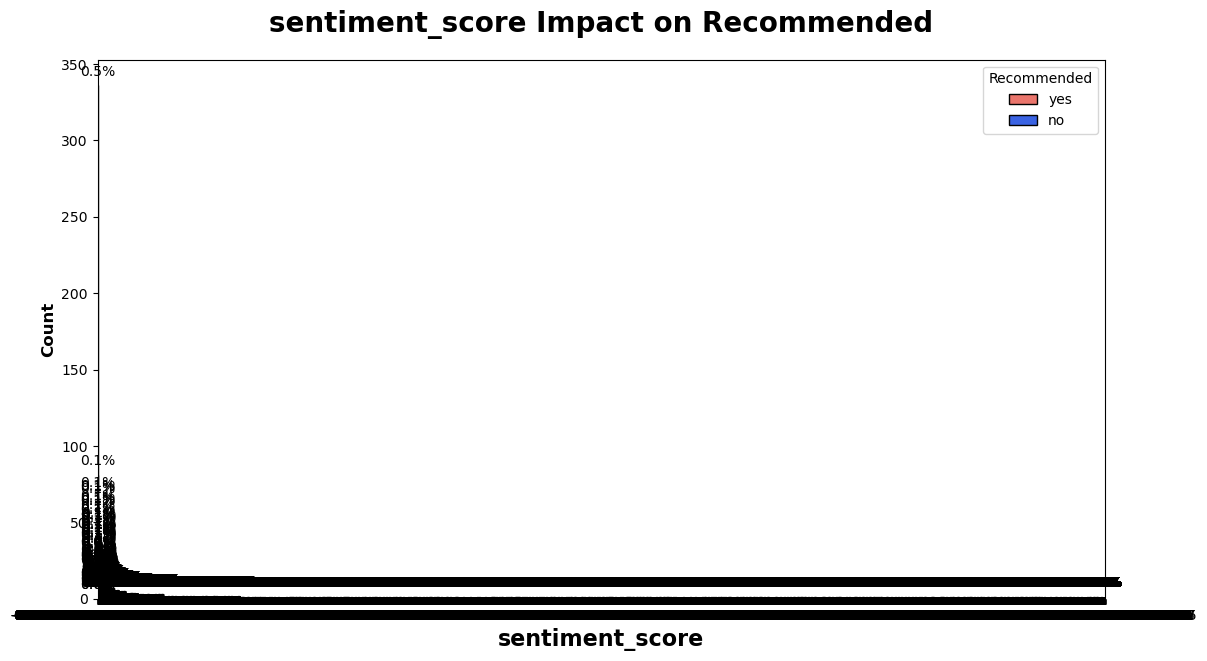

In [163]:
# Define a custom color palette for 'yes' and 'no' in 'recommended'
custom_palette = {'yes': '#FF6357', 'no': '#1E55FF'}  # Red for 'yes' and Blue for 'no'

# Sort 'cabin' by count in descending order
cabin_order = df["sentiment_score"].value_counts().sort_values(ascending=False).index

# Create the countplot with the custom color palette
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="sentiment_score", hue="recommended", data=df, ec="black", palette=custom_palette, order=cabin_order)

# Add title, labels, and legend
plt.title("sentiment_score Impact on Recommended", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("sentiment_score", weight="bold", fontsize=16)
plt.legend(title="Recommended", fancybox=True)

# Add percentage values on top of each bar
total_count = len(df)  # Total count of all rows in the dataset
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:0.1f}%',  # Display percentage with 1 decimal place
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()
